# Hierarchical Clustering

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing the dataset
data = pd.read_csv('Mall_Customers.csv')
# Take a glance at the dataset
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Reading the data
### Annual Income: Salary in thousand dollars
### Spending Score: 1 = less spending, 100 = more spending

In [3]:
# Splitting X and y
X = data.iloc[:, [3,4]].values

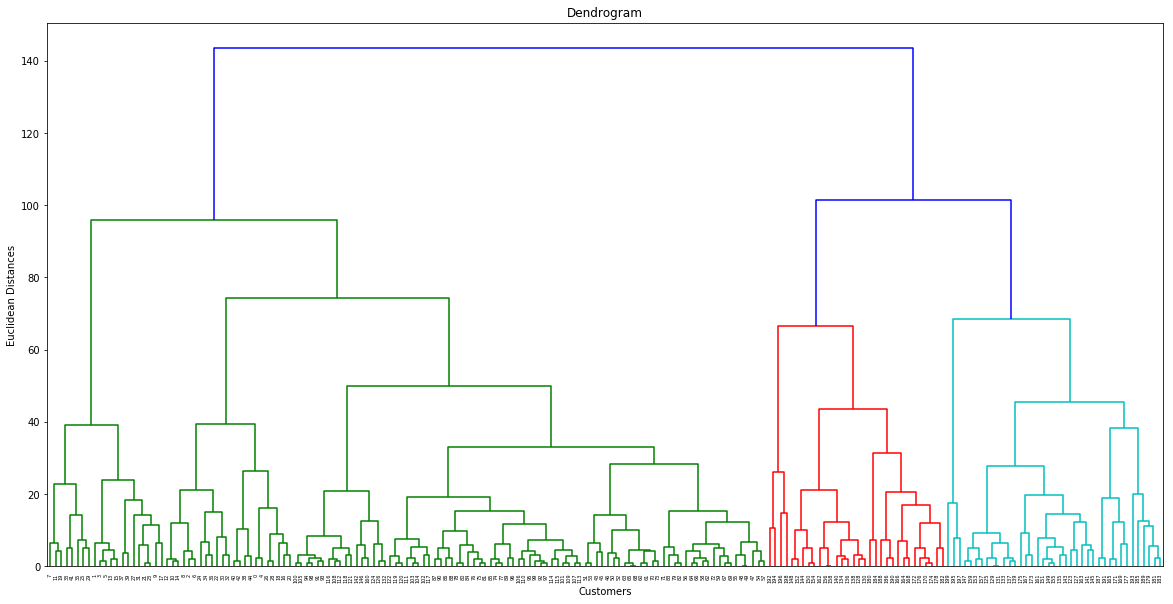

In [11]:
# Using dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=[20,10])
dendrogram = sch.dendrogram(sch.linkage(X,method = 'complete'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()


In [17]:
# Fitting hierarchical clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5,
                             affinity = 'euclidean',
                             linkage = 'complete')
y_hc = hc.fit_predict(X)

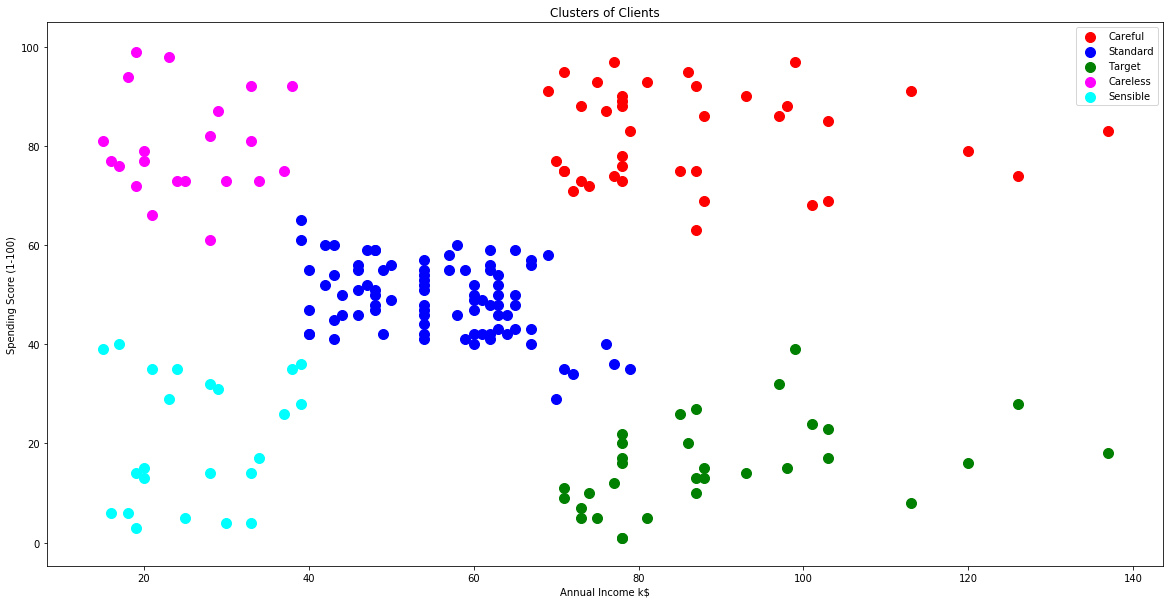

In [18]:
# Visualizing the clusters
# only for plotting the clusters in 2 dimensions

plt.figure(figsize=(20,10))
plt.scatter(X[y_hc == 0 , 0], X[y_hc == 0, 1], s = 100, c= 'red', label = 'Careful')
plt.scatter(X[y_hc == 1 , 0], X[y_hc == 1, 1], s = 100, c= 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2 , 0], X[y_hc == 2, 1], s = 100, c= 'green', label = 'Target')
plt.scatter(X[y_hc == 3 , 0], X[y_hc == 3, 1], s = 100, c= 'magenta', label = 'Careless')
plt.scatter(X[y_hc == 4 , 0], X[y_hc == 4, 1], s = 100, c= 'cyan', label = 'Sensible')
plt.title('Clusters of Clients')
plt.xlabel('Annual Income k$')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()